In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [8]:
# Завантаження даних
file_path = "TSLA.csv"  # Вкажіть шлях до файлу
data = pd.read_csv(file_path)


In [9]:
# Очищення даних
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Конвертуємо дату
data = data.dropna(subset=['Date', 'Close']).sort_values(by='Date')  # Видаляємо пропуски і сортуємо


In [10]:
# Відокремлення останніх двох місяців
cutoff_date = data['Date'].max() - pd.DateOffset(months=2)
last_two_months = data[data['Date'] >= cutoff_date]
remaining_data = data[data['Date'] < cutoff_date]

In [11]:
# Підготовка рядів для ARIMA
ts_data = remaining_data.set_index('Date')['Close']

In [14]:
# Перетворення індексу на часовий ряд із частотою
ts_data = ts_data.asfreq('B')  # 'B' означає робочі дні (Business days)

In [15]:
# Побудова моделі ARIMA
model = ARIMA(ts_data, order=(5, 1, 0))  # Параметри (p, d, q)
fitted_model = model.fit()


In [16]:
# Прогноз на 30 днів
forecast_steps = 30
forecast = fitted_model.forecast(steps=forecast_steps)

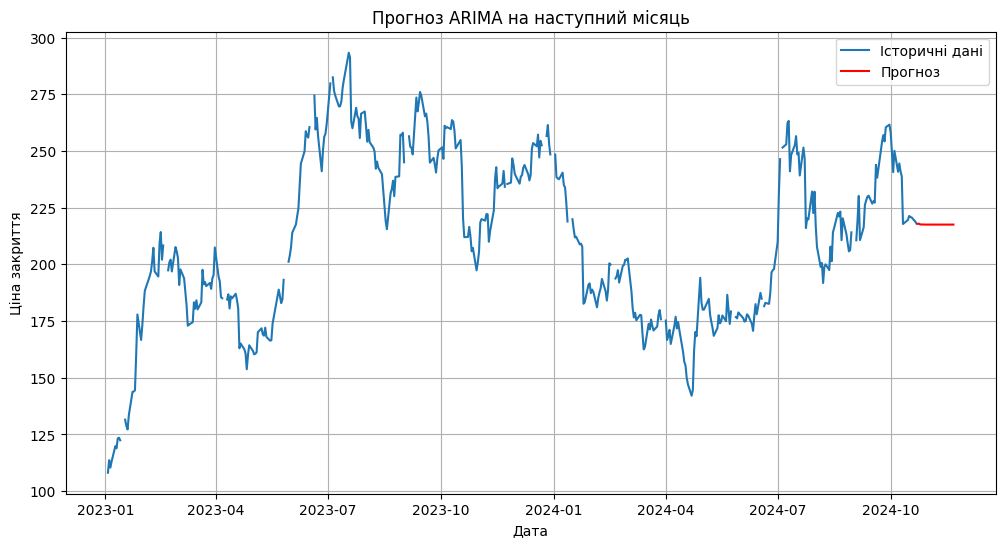

In [17]:
# Візуалізація
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Історичні дані')
plt.plot(pd.date_range(ts_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps), 
         forecast, label='Прогноз', color='red')
plt.title('Прогноз ARIMA на наступний місяць')
plt.xlabel('Дата')
plt.ylabel('Ціна закриття')
plt.legend()
plt.grid()
plt.show()


In [18]:
import numpy as np

# Збереження прогнозу у CSV
forecast_dates = pd.date_range(start=ts_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})
forecast_file = "forecast.csv"
forecast_df.to_csv(forecast_file, index=False)
print(f"Прогноз збережено у файл {forecast_file}")

Прогноз збережено у файл forecast.csv


In [19]:
# Завантаження правильних даних для перевірки похибки
true_data = last_two_months.set_index('Date')['Close']  # Останні два місяці
comparison_data = true_data[-forecast_steps:]  # Вибираємо останні дні, які співпадають із прогнозом

In [20]:
# Обчислення метрик похибки
mse = np.mean((comparison_data.values - forecast.values) ** 2)  # Середньоквадратична похибка
mae = np.mean(np.abs(comparison_data.values - forecast.values))  # Середня абсолютна похибка

In [21]:
print("Похибка прогнозу:")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")

Похибка прогнозу:
MSE (Mean Squared Error): 27254.32
MAE (Mean Absolute Error): 158.44


In [22]:
# Середнє значення реальних даних
mean_actual = comparison_data.mean()

# Обчислення відсоткової похибки
mse_percent = (np.sqrt(mse) / mean_actual) * 100
mae_percent = (mae / mean_actual) * 100

print("Відсоткова похибка прогнозу:")
print(f"MSE у відсотках: {mse_percent:.2f}%")
print(f"MAE у відсотках: {mae_percent:.2f}%")

Відсоткова похибка прогнозу:
MSE у відсотках: 43.91%
MAE у відсотках: 42.14%
